<div class='alert alert-info'>
    <h1>Cargando datos de un csv</h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import os

In [5]:
mainPath = '../datasets/'
filePath = 'titanic/titanic3.csv'
fullPath = os.path.join(mainPath, filePath)

In [6]:
data = pd.read_csv(fullPath, sep=',', dtype=None, header=0, names=None,
                   skiprows=None, index_col=None, skip_blank_lines=False, na_filter=False)

In [7]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,,,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,,,"Montreal, PQ / Chesterville, ON"


In [8]:
data.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

<div class='alert alert-success'>
    <h4> Cargar datos a través de la función open </h4>
</div>

Pandas lee todo el archivo completo.  Si el archivo es demasiado grande, esto satura la memoria RAM, por lo tanto no es optimo.  Usando la función **open** podemos leer linea a liena en un ciclo for.

In [9]:
data2 = open(fullPath, 'r')

cols = data2.readline().strip().split(',')
n_cols = len(cols)

# Número de filas
count = 0
mainDict = {}
for col in cols:
    mainDict[col] = []

for line in data2:
    values = line.strip().split(',')
    for i in range(n_cols):
        mainDict[cols[i]].append(values[i]) 
    count += 1
    
print("El data set tiene %d filas y %d columnas" %(count, n_cols))

El data set tiene 1309 filas y 14 columnas


In [10]:
# Creamos dataFrame a partir del diccionario.
data3 = pd.DataFrame(mainDict)
data3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"""Allen","Miss. Elisabeth Walton""",female,29,0,0,24160,211.3375,B5,S,2,
1,1,1,"""Allison","Master. Hudson Trevor""",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,
2,1,0,"""Allison","Miss. Helen Loraine""",female,2,1,2,113781,151.5500,C22 C26,S,,
3,1,0,"""Allison","Mr. Hudson Joshua Creighton""",male,30,1,2,113781,151.5500,C22 C26,S,,135
4,1,0,"""Allison","Mrs. Hudson J C (Bessie Waldo Daniels)""",female,25,1,2,113781,151.5500,C22 C26,S,,


<div class='alert alert-success'>
    <h4> Leer datos desde una URL </h4>
</div>

In [11]:
medals_url = 'http://winterolympicsmedals.com/medals.csv'

medals_data = pd.read_csv(medals_url)

medals_data.head()

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


In [12]:
import urllib3
http = urllib3.PoolManager()
r = http.request('GET', medals_url)
response = r.data

# Decodificamos
str_data = response.decode('utf-8')

# Dividimos por filas
lines = str_data.split('\n')

# La primer fila contien la cabecera, la extraemos
col_names = lines[0].split(',')
n_cols = len(col_names)

# Diccionario vacio
counter = 0
dic = {}

for col in col_names:
    dic[col] = []
    
# Llenamos fila a fila
for line in lines:
    # Saltamos la primer linea
    if (counter > 0):
        values = line.strip().split(',')
        # Agregamos cada valor a su columna
        for i in range(n_cols):
            dic[col_names[i]].append(values[i])
    counter += 1
    
print('El dataFrame tiene %d filas y %d columnas'%(counter, n_cols))

# Convertimos el diccionaro en dataFrame
medals_df = pd.DataFrame(dic)
print(medals_df.head())

# Guardamos el dataFrame
filename = 'athletes/downloadMedals.'
fullpath = os.path.join(mainPath, filename)
medals_df.to_csv(fullpath + 'csv')

El dataFrame tiene 2312 filas y 8 columnas
   Year      City       Sport      Discipline  NOC       Event Event gender  \
0  1924  Chamonix     Skating  Figure skating  AUT  individual            M   
1  1924  Chamonix     Skating  Figure skating  AUT  individual            W   
2  1924  Chamonix     Skating  Figure skating  AUT       pairs            X   
3  1924  Chamonix   Bobsleigh       Bobsleigh  BEL    four-man            M   
4  1924  Chamonix  Ice Hockey      Ice Hockey  CAN  ice hockey            M   

    Medal  
0  Silver  
1    Gold  
2    Gold  
3  Bronze  
4    Gold  


<div class='alert alert-success'>
    <h4> Leer datos XLS y XLSX </h4>
</div>

In [13]:
filePath1 = 'titanic/titanic3.xls'
filePath2 = 'titanic/titanic3.xlsx'

In [14]:
titanic1 = pd.read_excel(mainPath + filePath1, 'titanic3')
titanic2 = pd.read_excel(mainPath + filePath2, 'titanic3')
# el segundo argumento es el nombre de la pestaña a leer
titanic1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<div class='alert alert-info'>
    <h1> Analisis preliminar </h1>
</div>

In [15]:
# Trabajamos con el dataFram de titanic
filePath1 = 'titanic/titanic3.xls'
titanic_df = titanic1 = pd.read_excel(mainPath + filePath1, 'titanic3')
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [16]:
titanic_df.shape

(1309, 14)

In [17]:
titanic_df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [18]:
titanic_df.columns.values  # Nombre de la columnas

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

<div class='alert alert-success'>
    <h4> Resumen estadistico </h4>
</div>

In [19]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [20]:
titanic_df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

<div class='alert alert-success'>
    <h4> Valores faltantes </h4>
</div>

In [21]:
pd.isnull(titanic_df['body']).values.ravel().sum()  # Cantidad de true (nulos)

1188

In [22]:
pd.notnull(titanic_df['body']).values.ravel().sum()  # Cantidad de false (no nulos)

121

Borrando datos faltantes

In [27]:
data2 = titanic_df
data2 = data2.dropna(axis=0, how='any')  # axis = 0 filas,  1 columnas

Computo de valores faltantes

In [28]:
data3 = titanic_df
data3.fillna(0)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,160.809917,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,Desconocido,160.809917,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,Desconocido,135.000000,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,Desconocido,160.809917,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.000000,0,0,19952,26.5500,E12,S,3,160.809917,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1,0,13502,77.9583,D7,S,10,160.809917,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0000,A36,S,Desconocido,160.809917,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2,0,11769,51.4792,C101,S,D,160.809917,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.000000,0,0,PC 17609,49.5042,Desconocido,C,Desconocido,22.000000,"Montevideo, Uruguay"


In [25]:
data4 = titanic_df
keys = data4.columns.values
types = data4.dtypes    

In [26]:
# Reemplazo nulos numericos con el promedio, y los demas con 'Desconocido'
for i in range(len(keys)):
    if (types[i] == np.dtype('O')):
        data4[keys[i]] = data4[keys[i]].fillna('Desconocido')
    else:
        prom = data4[keys[i]].mean()
        data4[keys[i]] = data4[keys[i]].fillna(prom)
        
data4

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,160.809917,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,Desconocido,160.809917,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,Desconocido,135.000000,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,Desconocido,160.809917,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.000000,0,0,19952,26.5500,E12,S,3,160.809917,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1,0,13502,77.9583,D7,S,10,160.809917,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0000,A36,S,Desconocido,160.809917,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2,0,11769,51.4792,C101,S,D,160.809917,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.000000,0,0,PC 17609,49.5042,Desconocido,C,Desconocido,22.000000,"Montevideo, Uruguay"


<p>Llena con el valor anterior mas cercano</p>
<code>data['age'].fillna(method='ffill')</code> <i># forward fill</i>
<hr>
<p>Llena con el valor siguiente mas cercano</p>
<code>data['age'].fillna(method='backfill')</code> <i># back fill</i>

<div class='alert alert-success'>
    <h4> Valores dummy </h4>
</div>

In [32]:
dummy_sex = pd.get_dummies(data['sex'], prefix='sex')
dummy_sex.tail()

,sex_female,sex_male
1304,1,0
1305,1,0
1306,0,1
1307,0,1
1308,0,1


In [33]:
column_name = data.columns.values.tolist()

In [34]:
data = data.drop(['sex'], axis=1) #  borrar columna sex

In [37]:
data = pd.concat([data, dummy_sex], axis=1)
data.tail()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male,sex_female,sex_male
1304,3,0,"Zabour, Miss. Hileni",14.5,1,0,2665,14.4542,,C,,328,,1,0,1,0
1305,3,0,"Zabour, Miss. Thamine",,1,0,2665,14.4542,,C,,,,1,0,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",26.5,0,0,2656,7.2250,,C,,304,,0,1,0,1
1307,3,0,"Zakarian, Mr. Ortin",27,0,0,2670,7.2250,,C,,,,0,1,0,1
1308,3,0,"Zimmerman, Mr. Leo",29,0,0,315082,7.8750,,S,,,,0,1,0,1


In [36]:
data.shape

(1309, 15)

<div class='alert alert-info'>
    <h1> Graficos </h1>
</div>

In [38]:
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')
xlen, ylen = data.shape
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


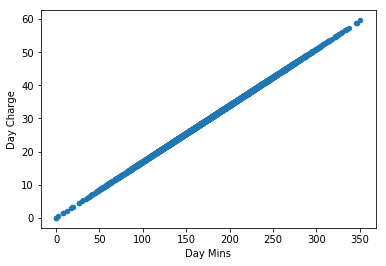

In [41]:
# scatter plot

data.plot(kind='scatter', x='Day Mins', y='Day Charge')

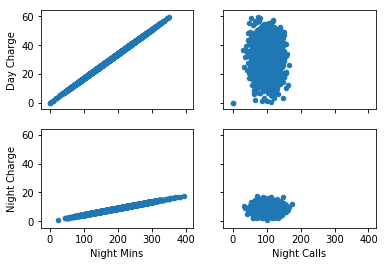

In [49]:
fig, axs = plt.subplots(2,2, sharey=True, sharex=True)
data.plot(kind='scatter', x='Day Mins', y='Day Charge', ax=axs[0][0])
data.plot(kind='scatter', x='Night Mins', y='Night Charge', ax=axs[1][0])
data.plot(kind='scatter', x='Day Calls', y='Day Charge', ax=axs[0][1])
data.plot(kind='scatter', x='Night Calls', y='Night Charge', ax=axs[1][1])


Text(0, 0.5, 'Frecuencia')

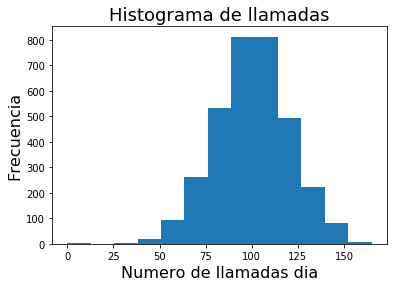

In [62]:
# Histograma

# Usemos la regla de Sturges
num_bins = int(np.round(1 + np.log2(xlen)))
plt.hist(data['Day Calls'], bins=num_bins)
plt.title('Histograma de llamadas', size=18)
plt.xlabel('Numero de llamadas dia', size=16)
plt.ylabel('Frecuencia', size=16)

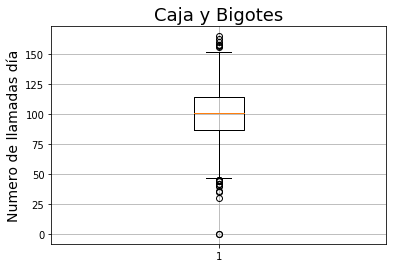

In [68]:
# Boxplot o diagrama de caja y bigotes

plt.boxplot(data['Day Calls'])
plt.title('Caja y Bigotes', size=18)
plt.ylabel('Numero de llamadas día', size=14)
plt.grid()

In [69]:
data['Day Calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64